# Kütüphaneler

In [2]:
import tensorflow as tf
import numpy as np
import pylab as pl
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers,activations

# Veriyi Yükleme

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir=r"Tensorflow\f1"

train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(224,224),subset="training",batch_size=2)

test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(224,224),subset="validation",batch_size=2)

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


# Veri Arttırma

In [1]:
def visualize(original, augmented):
    
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Orjinal image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Değişmiş image')
    plt.imshow(augmented)

In [4]:
image,_=test_datagen.next()

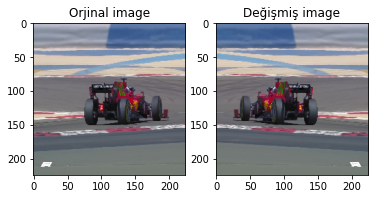

In [5]:
flipped = tf.image.flip_left_right(image) # Bir görüntüyü dikey veya yatay olarak çevirir
visualize(image[0], flipped[0])

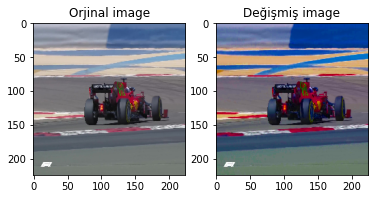

In [6]:
saturated = tf.image.adjust_saturation(image, 3) # Bir doygunluk faktörü sağlayarak bir görüntüyü doyurur
visualize(image[0], saturated[0])

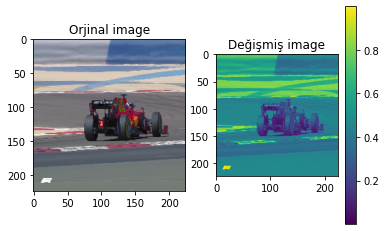

In [7]:
grayscaled = tf.image.rgb_to_grayscale(image) # Bir görüntüyü gri tonlama yapar
visualize(image[0], tf.squeeze(grayscaled)[0])
_ = plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


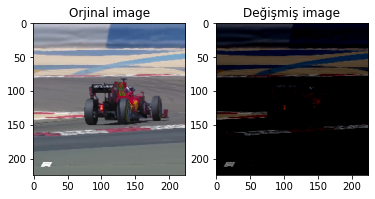

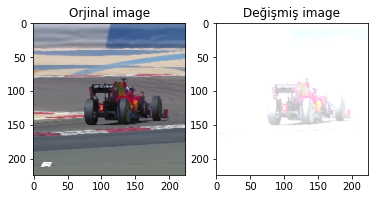

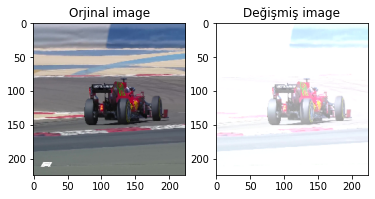

In [8]:
for i in range(3): # Görüntü parlaklığını rastgele değiştirir
    seed = (i, 0) 
    stateless_random_brightness = tf.image.stateless_random_brightness(
    image, max_delta=0.95, seed=seed)
    visualize(image[0], stateless_random_brightness[0])

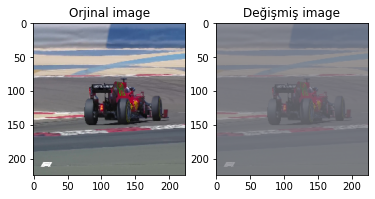

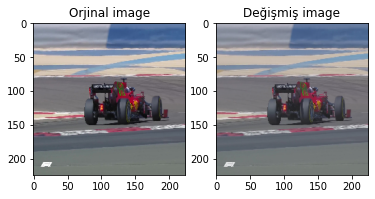

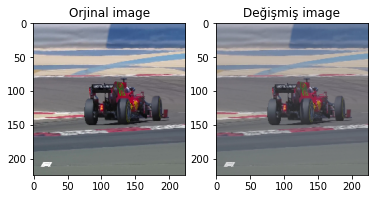

In [9]:
for i in range(3): # Rastgele görüntü kontrastını değiştirir
    seed = (i, 0)  
    stateless_random_contrast = tf.image.stateless_random_contrast(
    image, lower=0.1, upper=0.9, seed=seed)
    visualize(image[0], stateless_random_contrast[0])